HDS Final Project: Analysis of Agriculture Crop production in India Data Sets
This Dataset Describes the Agricuture Crops Cultivation/Production in india, Which region is suitable for what type of crop.

From Infographs Analysing cost of production, cost of cultivation, Yield of each crop state wise, Analysing which crop is best suited to be grown in which region from recomended zone, 




In [1]:
# Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# loading and readingh data set 1 local file
VariousCropsProduceData = pd.read_csv('Various_Crops_cultivation_and_Production.csv')
# print(VariousCropsProduceData.head)

# loading crop production data set 2 from git
cropProduce = pd.read_csv("https://raw.githubusercontent.com/neelima1818/Practice-work/main/Crops_Production_from_2006-2011.csv")
print(cropProduce.columns)
# cropProduce = cropProduce.set_index('Crop             ')
print(cropProduce.head())

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')
  Crop               Production 2006-07  Production 2007-08  \
0  Total Foodgrains               158.8               168.6   
1              Rice               200.8               207.9   
2             Wheat               131.6               136.4   
3             Jowar               124.3               137.8   
4             Bajra               136.4               161.5   

   Production 2008-09  Production 2009-10  Production 2010-11  Area 2006-07  \
0               171.3               159.4               178.9         128.5   
1               213.3               191.6               206.4         168.5   
2               140.1         

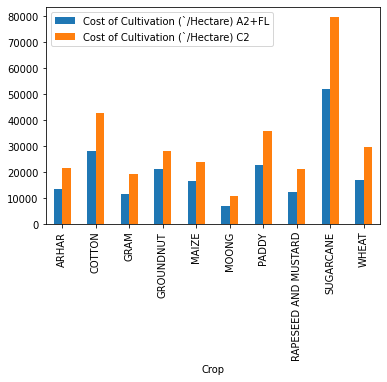

In [2]:
# Plot to view cost of cultivation crops
# Copying original dataframe and filtering to required columns
cost_of_cultivation = VariousCropsProduceData[["Crop","Cost of Cultivation (`/Hectare) A2+FL","Cost of Cultivation (`/Hectare) C2"]].copy()

# grouping by 'Crop' column and protting bar graph against different crops and cost of cultivation
cost_of_cultivation = cost_of_cultivation.groupby('Crop')[["Cost of Cultivation (`/Hectare) A2+FL","Cost of Cultivation (`/Hectare) C2"]].mean().reset_index()
fig = cost_of_cultivation.plot(kind='bar',x='Crop',y=["Cost of Cultivation (`/Hectare) A2+FL","Cost of Cultivation (`/Hectare) C2"])

Sugarcane production requires the highest cost of cultivation per hectare

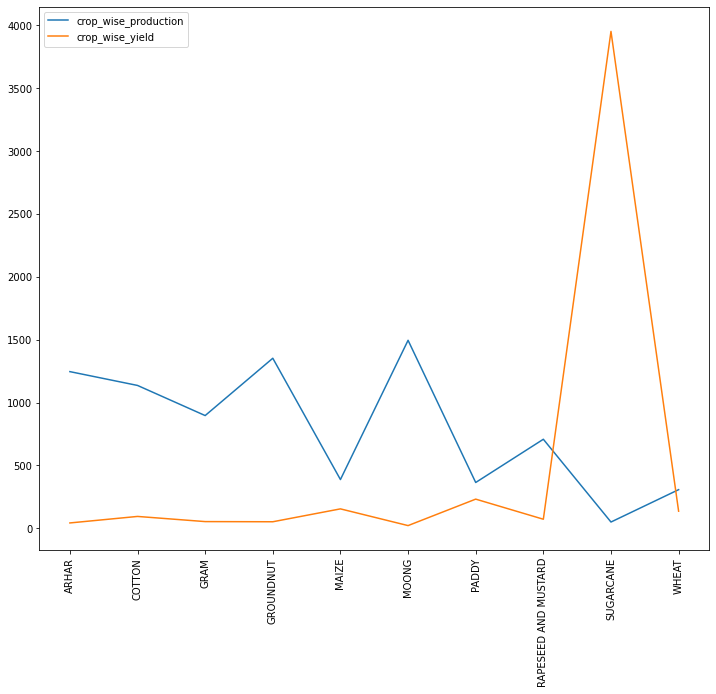

In [3]:
# legend series graph to see crop wise yeild trend and their respective cost of production
fig,axs = plt.subplots(figsize=(12,10))
crop_wise_production = VariousCropsProduceData.groupby(['Crop']).sum()['Cost of Production (`/Quintal) C2']/10
crop_wise_yield = VariousCropsProduceData.groupby(['Crop']).sum()['Yield (Quintal/ Hectare) ']
plt.plot(crop_wise_production)
plt.plot(crop_wise_yield)
plt.xticks(rotation ='vertical')
plt.legend(['crop_wise_production','crop_wise_yield'])

From grapgh we can see maximum yield/hectare is of sugarcane
sugarcane has low cost of production/quintal 

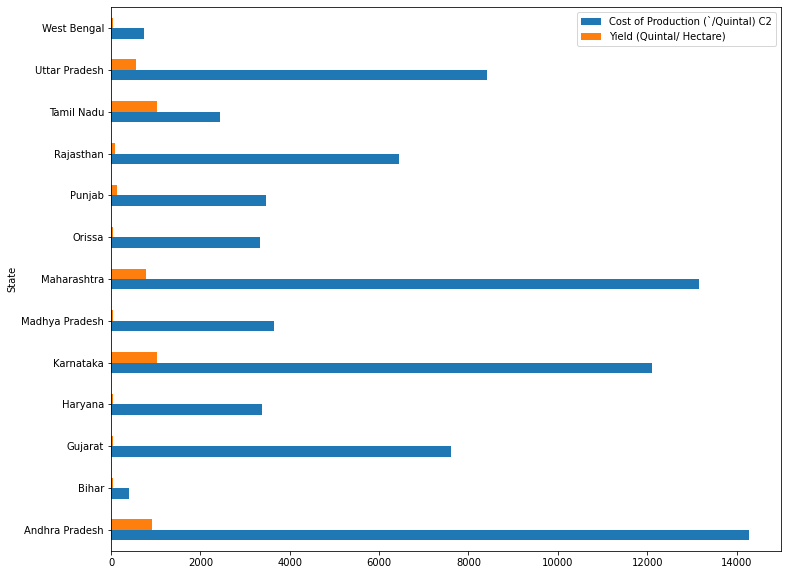

In [4]:
# Plot to see how each state produce and cost for producing that yield

stateWiseYield = VariousCropsProduceData.groupby(['State'])
stateWiseYield.sum()[['Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ']].plot(kind='barh',figsize=(12,10))


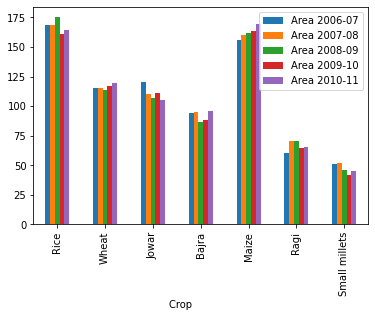

In [5]:
# Area size respective crops grown in year wise from 2006 to 2011
cropProduce = cropProduce.dropna()
# print(cropProduce)
# print(cropProduce.T)
cropProduce = cropProduce[["Crop             ","Area 2006-07","Area 2007-08","Area 2008-09","Area 2009-10","Area 2010-11"]].copy().head(8)
figlayout = cropProduce.drop(0).plot(kind='bar',x='Crop             ', y=["Area 2006-07","Area 2007-08","Area 2008-09","Area 2009-10","Area 2010-11"])


Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ',
       'Per Hectare Cost Price', 'Cost of cultivation per hectare',
       'Yield in Kg per hectare'],
      dtype='object')


Text(0, 0.5, 'Yield (Quintal/ Hectare)')

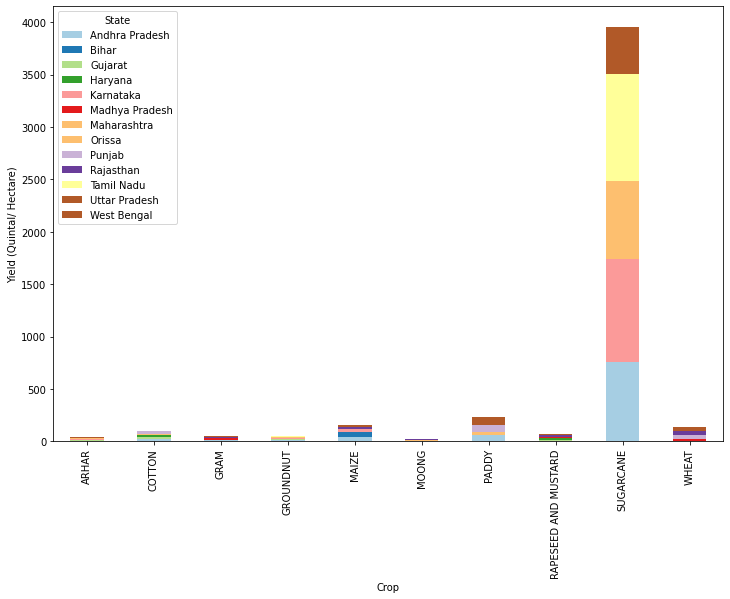

In [6]:
# New column creation and adding data to new df to view different crop production 

VariousCropsProduceData['Per Hectare Cost Price'] = VariousCropsProduceData['Cost of Production (`/Quintal) C2'] * VariousCropsProduceData['Yield (Quintal/ Hectare) ']
VariousCropsProduceData['Cost of cultivation per hectare'] = VariousCropsProduceData['Cost of Cultivation (`/Hectare) A2+FL'] + VariousCropsProduceData['Cost of Cultivation (`/Hectare) C2']
VariousCropsProduceData['Yield in Kg per hectare'] = VariousCropsProduceData['Yield (Quintal/ Hectare) '] * 100
print(VariousCropsProduceData.columns)
requireddata = VariousCropsProduceData[['Crop','State','Yield (Quintal/ Hectare) ']]
# pivoting the dataframe
table = requireddata.pivot('Crop','State','Yield (Quintal/ Hectare) ')
# fill Nan values with zero
table = table.fillna(0)
# plot (stacked bar plots) pivoted dataframe
table.plot(kind='bar',stacked=True,colormap='Paired',figsize=(12,8))
# setting Y label
plt.ylabel('Yield (Quintal/ Hectare)')

Data Source 3 with data of recommendations for which crop is best suited to grow 

In [12]:
# Dataset 3 with data of which staes are suitable for growing what crops
recommendedZones = pd.read_csv('Recommended_Zone_Of_Crops_Cultivation_And_Production.csv')
print(recommendedZones)
recommendedZones.drop('Unnamed: 4',axis=1,inplace=True)
recommendedZones.dropna(inplace=True)


# Functions for adding 1 to rows with crop that has particular state to column 'Recommended Zone' to use that later -
# for how many crops are suitable to grow in particular state 
def state1(row):
    if 'Andhra Pradesh' in row['Recommended Zone']:
        return 1
def state2(row):
    if 'Tamil Nadu' in row['Recommended Zone']:
        return 1
def state3(row):
    if 'Gujarat' in row['Recommended Zone']:
        return 1
def state4(row):
    if 'Orissa' in row['Recommended Zone']:
        return 1
def state5(row):
    if 'Punjab' in row['Recommended Zone']:
        return 1
def state6(row):
    if 'Haryana' in row['Recommended Zone']:
        return 1
def state7(row):
    if 'Uttar Pradesh' in row['Recommended Zone']:
        return 1
def state8(row):
    if 'Rajasthan' in row['Recommended Zone']:
        return 1
def state9(row):
    if 'Karnataka' in row['Recommended Zone']:
        return 1
def state10(row):
    if 'Madhya Pradesh' in row['Recommended Zone']:
        return 1
def state11(row):
    if 'West Bengal' in row['Recommended Zone']:
        return 1

           Crop                     Variety Season/ duration in days  \
0         Paddy  Chinsurah Rice (IET 19140)                   Medium   
1         Paddy              (CNI 383-5-11)                      NaN   
2         Paddy         IGKVR-1 (IET 19569)                Mid-early   
3         Paddy         IGKVR-2 (IET 19795)                   Medium   
4         Paddy        CR Dhan 401 (REETA)                   145-150   
..          ...                         ...                      ...   
73        Mesta            SHRESTHA (JRM-5)                        -   
74       Cotton                      CNH012                      165   
75       Cotton           CICR-3 (CISA 614)                      150   
76       Cotton                   VBCH 2231                      NaN   
77  Desi Cotton                     FDK 124                      NaN   

                                     Recommended Zone  Unnamed: 4  
0   Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...         NaN  

In [13]:
# Adding different states as columns to the dataframe and values using above state function
recommendedZones['Andhra Pradesh'] = recommendedZones.apply(state1,axis=1)
recommendedZones['Tamil Nadu']=recommendedZones.apply(state2,axis=1)
recommendedZones['Gujarat']=recommendedZones.apply(state3,axis=1)
recommendedZones['Orissa']=recommendedZones.apply(state4,axis=1)
recommendedZones['Punjab']=recommendedZones.apply(state5,axis=1)
recommendedZones['Haryana']=recommendedZones.apply(state6,axis=1)
recommendedZones['Uttar Pradesh']=recommendedZones.apply(state7,axis=1)
recommendedZones['Rajasthan']=recommendedZones.apply(state8,axis=1)
recommendedZones['Karnataka']=recommendedZones.apply(state9,axis=1)
recommendedZones['Madhya Pradesh']=recommendedZones.apply(state10,axis=1)
recommendedZones['West Bangal']=recommendedZones.apply(state11,axis=1)
recommendedZones.fillna(0)

,Crop,Variety,Season/ duration in days,Recommended Zone,Andhra Pradesh,Tamil Nadu,Gujarat,Orissa,Punjab,Haryana,Uttar Pradesh,Rajasthan,Karnataka,Madhya Pradesh,West Bangal
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...",1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra...",1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Paddy,CR Dhan 601 (IET 18558),160,"Boro Area of Orissa, West Bengal and Assam.",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Paddy,CR Dhan 501 (IET 19189),152,Semi deep water condition of Uttar Pradesh and...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,Paddy,RC Maniphou 11 (IET 20193),132-135,Terraced area of Meghalaya and Manipur hills b...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Wheat,MPO(JW) 1215 (MPO 1215),120,"Madhya Pradesh, Chhattisgarh, Gujarat and Raja...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,Wheat,MACS 6222,108,"Maharashtra, Karnataka, Andhra Pradesh and Tam...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,Wheat,PDW 314,169,"Punjab, Haryana, Western Uttar Pradesh, Delhi,...",0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


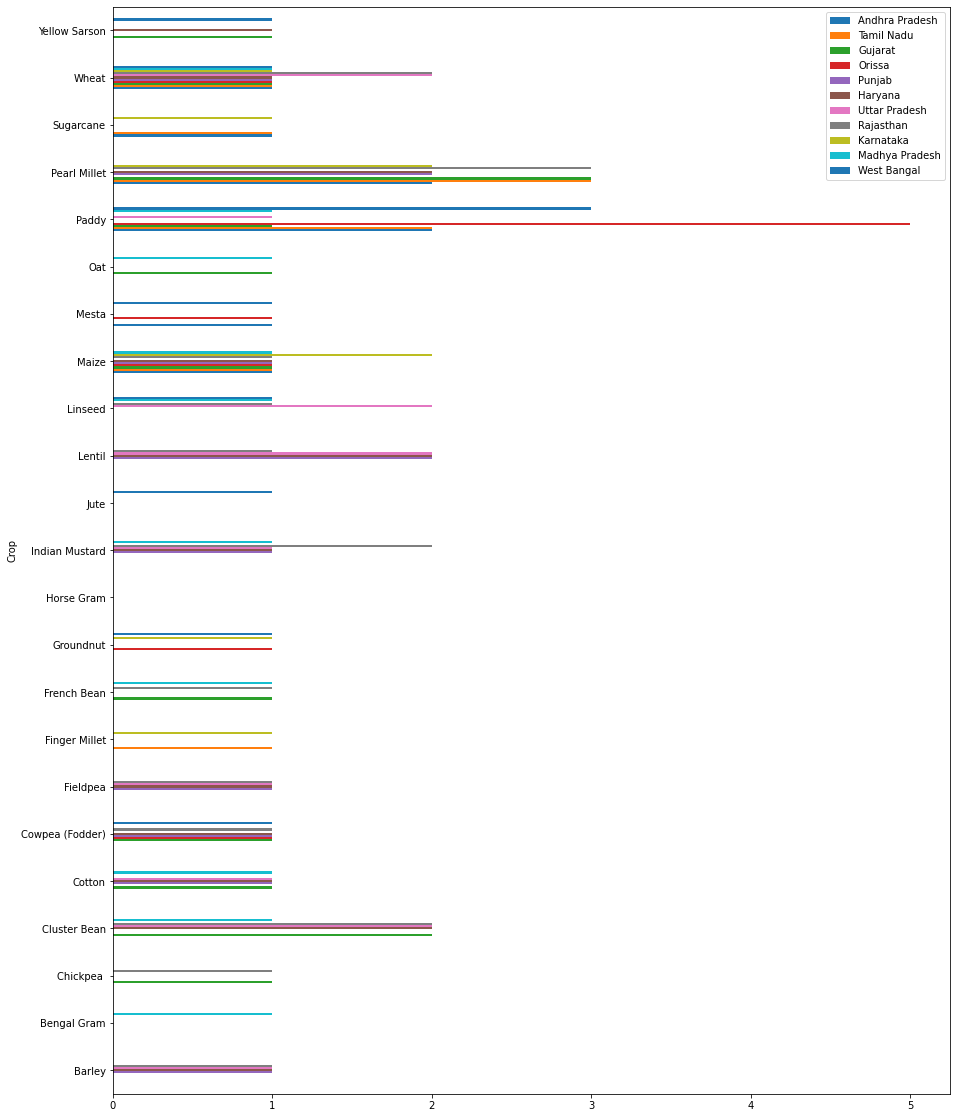

In [14]:
# Crops that are recommended to be grown in different regions gives aggregation of each state how many crops can be grown
corps_Zones = recommendedZones.groupby('Crop').sum().plot(kind='barh',figsize=(15,20))


wheat growm in most the mentioned states
Better zones for growing paddy is Orissa and west Bengal

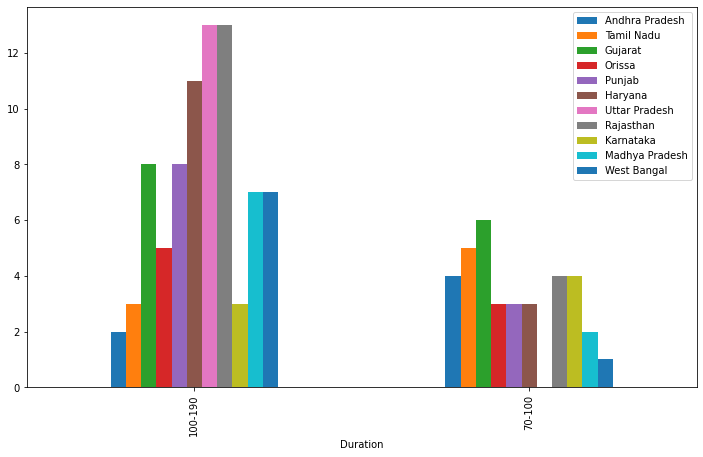

In [15]:
# Filtering data to check which staes are suitable for growing crops that are with in certain period of days
dataframe = pd.DataFrame(recommendedZones.groupby('Season/ duration in days').count().reset_index())
dataframe1 = pd.DataFrame([dataframe.loc[1:27].sum(),dataframe.loc[29:37].sum()])
dataframe1.drop('Season/ duration in days',axis=1,inplace=True)
dataframe1 = dataframe1.assign(Duration = ['100-190','70-100'])

dataframe1[['Andhra Pradesh', 'Tamil Nadu',
       'Gujarat', 'Orissa', 'Punjab', 'Haryana', 'Uttar Pradesh', 'Rajasthan',
       'Karnataka', 'Madhya Pradesh', 'West Bangal', 'Duration']].plot(x = 'Duration',kind='bar',figsize=(12,7))


For Crops that require 100-190 days most favorable state for growing crops is UP and Rajasthan
For Crops that require 70-100 days best state to grow them is Gujarat

    Crop                     Variety Season/ duration in days  \
0  Paddy  Chinsurah Rice (IET 19140)                   Medium   
2  Paddy         IGKVR-1 (IET 19569)                Mid-early   
3  Paddy         IGKVR-2 (IET 19795)                   Medium   
4  Paddy        CR Dhan 401 (REETA)                   145-150   
5  Paddy     CR Dhan 601 (IET 18558)                      160   

                                    Recommended Zone  Andhra Pradesh  \
0  Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...             1.0   
2  Chhattisgarh, Madhya Pradesh and Orissa under ...             NaN   
3  Chhattisgarh, Bihar and Orissa under  both irr...             NaN   
4  Orissa, West Bengal, Tamil Nadu and Andhra Pra...             1.0   
5        Boro Area of Orissa, West Bengal and Assam.             NaN   

   Tamil Nadu  Gujarat  Orissa  Punjab  Haryana  Uttar Pradesh  Rajasthan  \
0         1.0      1.0     1.0     NaN      NaN            NaN        NaN   
2         NaN      NaN

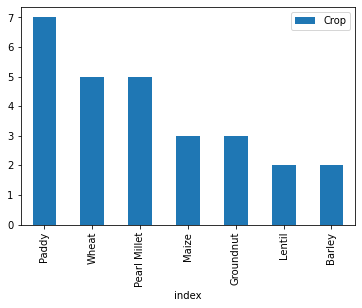

In [16]:
# Crops with most varities
print(recommendedZones.head())
fig = recommendedZones.Crop.value_counts().reset_index().head(7).plot(kind='bar', x='index', y='Crop')

Conclusions from data visualizations of Agriculture production in India for early decade of 2000's

From this data framers in india can get awareness of which crop is suited for which region and cost of cultivation Vs yield, based on crop produce time days which crop suits for their region.

This can help farmers from choosing better crop and benefit with yield and cost involved.

From the data Sugrcane crop is one of the best to grow in certain regions comparing cost to cultivate and Yield produce.

One of the Best suitable crop to be grown in westbengal and orissa is 'Paddy', Wheat is one of the crop that is grown in most states.
